<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/11-01-CNN-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.

# CNN - MNIST



In [12]:
import numpy as np
import tensorflow as tf
import random

In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print('x_train.shape:', x_train.shape, 'y_train.shape:', y_train.shape)

x_train.shape: (60000, 28, 28) y_train.shape: (60000,)


In [16]:
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
print('x_train.shape:', x_train.shape, 'x_test.shape:', x_test.shape)

x_train.shape: (60000, 28, 28, 1) x_test.shape: (10000, 28, 28, 1)


In [18]:
# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

In [20]:
tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
__________________________________________________

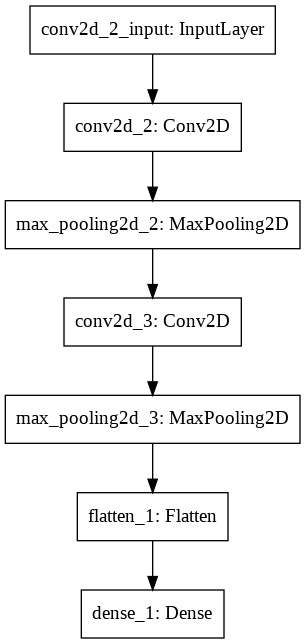

In [21]:
tf.keras.utils.plot_model(tf.model)

In [22]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs, verbose=0)

In [23]:
# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

index:  972 actual y:  0 predicted y:  0
index:  5667 actual y:  2 predicted y:  2
index:  7373 actual y:  1 predicted y:  1
index:  29 actual y:  1 predicted y:  1
index:  2679 actual y:  2 predicted y:  2
index:  4774 actual y:  1 predicted y:  1
index:  1475 actual y:  6 predicted y:  6
index:  146 actual y:  8 predicted y:  8
index:  8951 actual y:  0 predicted y:  0
index:  711 actual y:  5 predicted y:  5
313/313 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9873
loss:  0.038033563643693924
accuracy 0.9872999787330627
